In [12]:
import numpy as np
import matplotlib.pyplot as plt
import emcee
from popsims.galaxy import avr_aumer
%matplotlib inline

In [13]:
#kinematics of the star in UVW space


<function popsims.galaxy.avr_aumer(sigma, direction='vertical', verbose=False)>

[Text(0.5, 0, 'Age (Gyr)'), Text(0, 0.5, 'Vertical velocity disp (km/s)')]

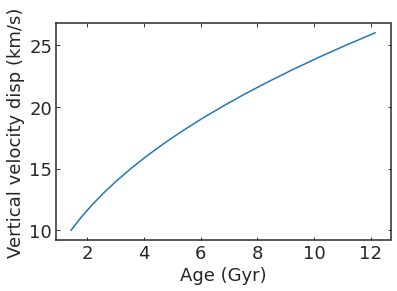

In [20]:
#visualize vertical velocity dispersion-age relation from Aumer & Binney
fig, ax=plt.subplots()
ax.plot( avr_aumer(np.arange(10, 27)), np.arange(10, 27))
ax.set(xlabel='Age (Gyr)', ylabel='Vertical velocity disp (km/s)')


In [ ]:
#rough model
#age ~uniform(0, 13)
#sigma_z ~avr(age)
#v_z ~ normal(sigma_z, 0)
#loglike= -|v_z-v_zobs|**2/(v_zobs_unc**2)

In [27]:
WOBS= (-1.30, 0.03)

In [45]:
#Gaussian mixture model
import emcee

# Define the probabilistic model...
# A simple prior:

def lnprior(t):
    # We'll just put reasonable uniform priors on all the parameters.
    if np.logical_or(t<0, t>13).any():
        return -np.inf
    return 0

# The "foreground" linear likelihood:
def lnlike(vz):
    return -0.5 *((vz-WOBS[0])**2/WOBS[-1]**2)

# Full probabilistic model.
def lnprob(t):
    lp= lnprior(t)
    #compute vz
    sigma_z= avr_aumer(t)
    vz= np.random.normal(0, sigma_z)
    return lp + lnlike(vz)

# Initialize the walkers at a reasonable location.
ndim, nwalkers = 1, 32
p0 = [5]
p0 = [p0 + 1e-5 * np.random.randn(ndim) for k in range(nwalkers)]

# Set up the sampler.
sampler = emcee.EnsembleSampler(nwalkers, ndim, lnprob)

# Run a burn-in chain and save the final location.
pos, _, _, _ = sampler.run_mcmc(p0, 500)

# Run the production chain.
sampler.reset()
sampler.run_mcmc(pos, 10000);

In [46]:
ndim

1

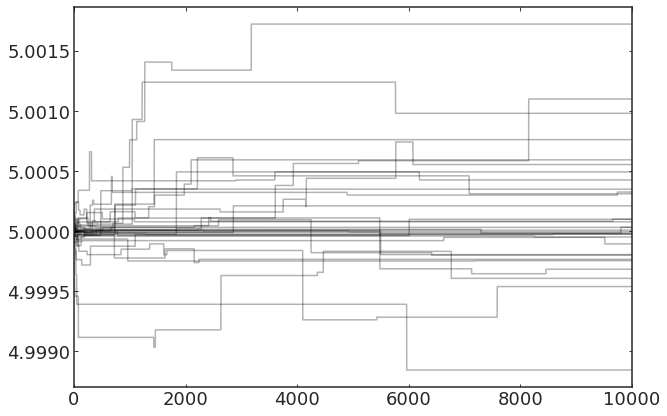

In [47]:
fig, ax = plt.subplots( figsize=(10, 7))
samples = sampler.get_chain()
#labels = ["m", "b", "log(f)"]
for i in range(ndim):
    #ax = axes[i]
    ax.plot(samples[:, :, i], "k", alpha=0.3)
    ax.set_xlim(0, len(samples))
    #ax.set_ylabel(labels[i])
    ax.yaxis.set_label_coords(-0.1, 0.5)

#axes[-1].set_xlabel("step number");


In [48]:
flat_samples = sampler.get_chain(discard=100, thin=15, flat=True)

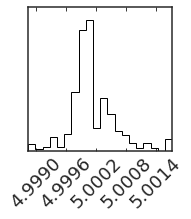

In [50]:
import corner

fig = corner.corner(
    flat_samples,
);